In [121]:
import music21
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from music21 import *

## Reading and Writing 
- score = converter.parse(‘path/to/file/in.mid’) 
- midi_out = score.write(‘midi’, fp=’path/to/file/out.mid’)
Can also be used

In [12]:
def open_midi(midi_path):
    # There is an one-line method to read MIDIs
    mf = midi.MidiFile()
    mf.open(midi_path)
    mf.read()
    mf.close()
    return midi.translate.midiFileToStream(mf)

In [13]:
midi_file = open_midi('/Users/noelalben/github/midi_glispitch/Test_files/beethoven_opus10_1.mid')

In [65]:
midTrack = music21.midi.translate.streamHierarchyToMidiTracks(midi_file)

In [77]:
me1 = midi.MidiEvent(midTrack)

<music21.midi.MidiEvent None, track=<built-in method index of list object at 0x7fab3ae49200>, channel=None>

In [76]:
dt = midi.DeltaTime(midTrack)
dt

<music21.midi.DeltaTime (empty) track=<built-in method index of list object at 0x7fab3ae49200>, channel=None>

In [69]:
midTrack

[<music21.midi.MidiTrack 0 -- 3684 events>,
 <music21.midi.MidiTrack 1 -- 5784 events>,
 <music21.midi.MidiTrack 2 -- 5744 events>]

In [70]:
me1 = midi.MidiEvent(midTrack)

In [71]:
me1

<music21.midi.MidiEvent None, track=<built-in method index of list object at 0x7fab3ae49200>, channel=None>

In [14]:
def list_instruments(midi):
    partStream = midi.parts.stream()
    print("List of instruments found on MIDI file:")
    for p in partStream:
        aux = p
        print (p.partName)


In [15]:
list_instruments(midi_file)

List of instruments found on MIDI file:
Piano right
Piano left


In [24]:
def extract_notes(midi_part):
    parent_element = []
    ret = []
    ret1=[]
    ele=[]
    for nt in midi_part.flat.notes:        
        if isinstance(nt, note.Note):
            ret.append(max(0.0, nt.pitch.ps))
            parent_element.append(nt)
        elif isinstance(nt, chord.Chord):
            for pitch in nt.pitches:
                ret1.append(max(0.0, pitch.ps))
                ele.append(nt)
    
    return ret, parent_element,ret1,ele

In [38]:
    for i in range(len(midi_file.parts)):
        top = midi_file.parts[i].flat.notes  
        top.duration
        a,b,c,d = extract_notes(top)

In [ ]:
# Got the offsets and a diff for the how long the note lasts

In [119]:
l = []
for i in (midi_file.parts[0].flat.notes):
    l.append(i.offset)

In [122]:
l = np.asarray(l)
k = np.diff(l)

In [124]:
l

array([0.0, 1.75, 2.0, ..., 1168.0, 1171.0, 1174.0], dtype=object)

In [128]:
for i in k:
    print(i)

1.75
0.25
0.75
0.25
0.75
0.25
0.75
0.25
1.0
2.0
1.0
2.0
1.0
1.75
0.25
0.75
0.25
0.75
0.25
0.75
0.25
1.0
2.0
1.0
2.0
0.75
0.25
1.5
0.5
1.0
2.0
0.75
0.25
1.5
0.5
1.0
2.0
0.75
0.25
1.5
0.5
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
3.0
0.3333333333333357
1/3
0.3333333333333357
0.3333333333333357
1/3
0.3333333333333357
4.0
0.3333333333333357
1/3
0.3333333333333357
0.3333333333333357
1/3
0.3333333333333357
4.0
0.3333333333333357
1/3
0.3333333333333357
0.3333333333333357
1/3
0.3333333333333357
1.75
0.25
0.75
0.25
0.75
0.25
0.75
0.25
1.0
1.75
0.25
0.75
0.25
0.75
0.25
0.75
0.25
1.0
1.75
0.25
0.75
0.25
0.75
0.25
0.75
0.25
0.75
0.25
1.0
2.0
1.0
2.0
1.0
9.0
1.0
1.0
0.0
2.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
2.0
1.0
1.0
0.0
2.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
2.0
1.0
1.0
0.0
2.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
4.0
1.0
1.0
1.0
3.0
1.0
1.0
1.0
2.5
0.5
0.5
0.5
0.5
1.0
0.5
0.5
0.5
0.5
1.0
0.5
0.5
0.5
0.5
0.5
3.0
1.5
0.5
1.0
3.0
3.0
3.0
0.5
0.25
0.25
0.5
0.5
1.0
3.

In [110]:
for i in (midi_file.parts[0].flat.notes):
    print(i.quaterLength)

AttributeError: 'Chord' object has no attribute 'quaterLength'

In [99]:
top.

0.0

In [89]:
for i in parent_element:
    print(i.offset)


0.0
0.0
0.0
0.0
8.0
8.0
9.0
9.0
11.0
11.0
12.0
12.0
12.0
12.0
12.0
20.0
20.0
20.0
21.0
21.0
21.0
23.0
23.0
26.0
26.0
26.0
27.0
27.0
27.0
29.0
29.0
29.0
32.0
32.0
33.0
33.0
35.0
35.0
38.0
38.0
38.0
39.0
39.0
39.0
41.0
41.0
42.0
42.0
44.0
44.0
45.0
45.0
50.0
50.0
50.0
50.0
51.0
51.0
51.0
56.0
56.0
56.0
57.0
57.0
57.0
62.0
62.0
63.0
63.0
63.0
63.0
68.0
68.0
68.0
69.0
69.0
69.0
74.0
74.0
74.0
75.0
75.0
75.0
80.0
80.0
80.0
81.0
81.0
81.0
84.0
84.0
84.0
87.0
87.0
87.0
87.0
93.0
96.0
96.0
99.0
99.0
102.0
102.0
105.0
105.0
108.0
108.0
111.0
111.0
114.0
114.0
117.0
117.0
120.0
120.0
123.0
123.0
126.0
126.0
129.0
129.0
132.0
132.0
135.0
138.0
141.0
142.0
143.0
144.0
144.0
145.0
146.0
147.0
147.0
148.0
149.0
150.0
150.0
151.0
152.0
153.0
153.0
154.0
155.0
156.0
156.0
157.0
158.0
159.0
159.0
160.0
161.0
162.0
162.0
163.0
164.0
165.0
165.5
166.0
166.5
167.0
167.5
168.0
168.5
169.0
169.5
170.0
170.5
171.0
171.5
172.0
172.5
173.0
173.5
174.0
174.5
175.0
175.5
176.0
176.5
177.0
177.5
178.0
178.5
179.0

In [45]:
a

[63.0,
 61.0,
 63.0,
 60.0,
 63.0,
 70.0,
 72.0,
 68.0,
 72.0,
 66.0,
 68.0,
 65.0,
 68.0,
 58.0,
 57.0,
 46.0,
 53.0,
 55.0,
 56.0,
 46.0,
 52.0,
 53.0,
 46.0,
 55.0,
 50.0,
 51.0,
 53.0,
 46.0,
 48.0,
 50.0,
 46.0,
 51.0,
 53.0,
 55.0,
 56.0,
 46.0,
 52.0,
 53.0,
 55.0,
 46.0,
 50.0,
 51.0,
 53.0,
 46.0,
 48.0,
 50.0,
 51.0,
 58.0,
 55.0,
 58.0,
 53.0,
 58.0,
 51.0,
 58.0,
 53.0,
 58.0,
 55.0,
 58.0,
 53.0,
 58.0,
 55.0,
 58.0,
 56.0,
 58.0,
 53.0,
 58.0,
 55.0,
 58.0,
 56.0,
 58.0,
 50.0,
 58.0,
 53.0,
 58.0,
 51.0,
 58.0,
 50.0,
 58.0,
 51.0,
 58.0,
 53.0,
 58.0,
 51.0,
 58.0,
 53.0,
 58.0,
 55.0,
 58.0,
 51.0,
 58.0,
 53.0,
 58.0,
 55.0,
 58.0,
 51.0,
 58.0,
 55.0,
 58.0,
 51.0,
 58.0,
 51.0,
 58.0,
 55.0,
 58.0,
 51.0,
 58.0,
 53.0,
 58.0,
 56.0,
 58.0,
 53.0,
 58.0,
 53.0,
 58.0,
 56.0,
 58.0,
 53.0,
 58.0,
 50.0,
 58.0,
 53.0,
 58.0,
 50.0,
 58.0,
 50.0,
 58.0,
 53.0,
 58.0,
 50.0,
 58.0,
 51.0,
 50.0,
 51.0,
 50.0,
 51.0,
 43.0,
 51.0,
 44.0,
 51.0,
 46.0,
 51.0,
 44.0,
 51.0,

In [32]:
a,b,c,d = extract_notes(top)

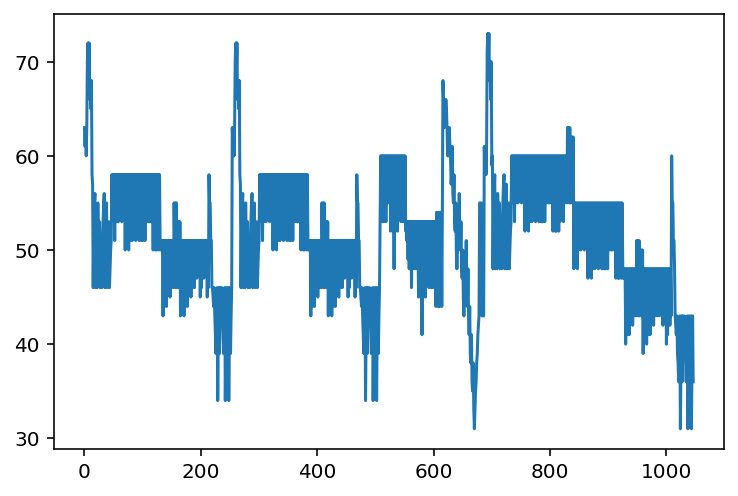

In [39]:
plt.plot(a)

In [36]:
b

[<music21.note.Note G>,
 <music21.note.Note E->,
 <music21.note.Note C>,
 <music21.note.Note G>,
 <music21.note.Note E->,
 <music21.note.Note C>,
 <music21.note.Note G>,
 <music21.note.Note E->,
 <music21.note.Note E->,
 <music21.note.Note B>,
 <music21.note.Note F>,
 <music21.note.Note D>,
 <music21.note.Note B>,
 <music21.note.Note F>,
 <music21.note.Note D>,
 <music21.note.Note B>,
 <music21.note.Note F>,
 <music21.note.Note F>,
 <music21.note.Note C>,
 <music21.note.Note G>,
 <music21.note.Note F>,
 <music21.note.Note E->,
 <music21.note.Note D>,
 <music21.note.Note C>,
 <music21.note.Note G>,
 <music21.note.Note F>,
 <music21.note.Note C>,
 <music21.note.Note B>,
 <music21.note.Note D>,
 <music21.note.Note F>,
 <music21.note.Note G#>,
 <music21.note.Note G>,
 <music21.note.Note F>,
 <music21.note.Note E->,
 <music21.note.Note F>,
 <music21.note.Note G#>,
 <music21.note.Note D>,
 <music21.note.Note F>,
 <music21.note.Note E->,
 <music21.note.Note D>,
 <music21.note.Note C>,
 <music

In [35]:
d

[<music21.chord.Chord E-4 G4 C5>,
 <music21.chord.Chord E-4 G4 C5>,
 <music21.chord.Chord E-4 G4 C5>,
 <music21.chord.Chord G4 C5>,
 <music21.chord.Chord G4 C5>,
 <music21.chord.Chord G4 C5>,
 <music21.chord.Chord G4 C5>,
 <music21.chord.Chord G4 B4>,
 <music21.chord.Chord G4 B4>,
 <music21.chord.Chord G#4 F4 B4>,
 <music21.chord.Chord G#4 F4 B4>,
 <music21.chord.Chord G#4 F4 B4>,
 <music21.chord.Chord B4 D5>,
 <music21.chord.Chord B4 D5>,
 <music21.chord.Chord B4 D5>,
 <music21.chord.Chord B4 D5>,
 <music21.chord.Chord C5 E-5>,
 <music21.chord.Chord C5 E-5>,
 <music21.chord.Chord G4 C5 E-5>,
 <music21.chord.Chord G4 C5 E-5>,
 <music21.chord.Chord G4 C5 E-5>,
 <music21.chord.Chord C5 E-5>,
 <music21.chord.Chord C5 E-5>,
 <music21.chord.Chord B4 D5>,
 <music21.chord.Chord B4 D5>,
 <music21.chord.Chord G4 C5 E-5>,
 <music21.chord.Chord G4 C5 E-5>,
 <music21.chord.Chord G4 C5 E-5>,
 <music21.chord.Chord G4 G5>,
 <music21.chord.Chord G4 G5>,
 <music21.chord.Chord F5 F4>,
 <music21.chord.Ch